# Quickstart

The following is a simple example of using `pocoMC` to get started. We will sample the infamous Rosenbrock distribution in 10D.

## Likelihood function and prior distribution

The first step in any analysis is to define the *prior distribution* and *likelihood function*. More precisely, for computational reasons, we require the *logarithm* of the prior probability density function $\log\pi(\theta)\equiv \log p(\theta)$ and the *logarithm* of the likelihood function $\log \mathcal{L}(\theta)\equiv\log P(d\vert \theta)$.

In [1]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 10

# Define our 10-D Rosenbrock log-likelihood.
def log_likelihood(x):
    return -np.sum(10.0*(x[:,::2]**2.0 - x[:,1::2])**2.0 \
            + (x[:,::2] - 1.0)**2.0, axis=1)

# Define our uniform prior.
def logprior(x):
    if np.any(x < -10.0) or np.any(x > 10.0):
        return -np.inf
    else:
        return 0.0

## Preconditioned Monte Carlo sampling

The next step is to initialise the *PMC sampler* using ``pocoMC`` and configure it for our analysis.

In [2]:
# import pocoMC
import pocomc as pc

# Number of particles to use
nparticles = 1000

# Initialise sampler
sampler = pc.Sampler(nparticles,
                     ndim,
                     loglikelihood=log_likelihood,
                     logprior=logprior,
                     vectorize_likelihood=True,
                     bounds=(-10.0, 10.0))

Finally, once we produce some samples from the prior distribution we can start sampling.

In [3]:
# Initialise particles' positions using samples from the prior (this is very important, other initialisation will not work).
prior_samples = np.random.uniform(low=-10.0, high=10.0, size=(nparticles, ndim))

# Start sampling
sampler.run(prior_samples)

# We can add more samples at the end
sampler.add_samples(1000)

# Get results
results = sampler.results

Iter: 67it [05:17,  4.75s/it, beta=1, calls=611000, ESS=0.998, logZ=-30.6, accept=0.218, N=5, scale=1.04, corr=0.738]        
Iter: 1it [00:00,  3.21it/s, beta=1, calls=616000, ESS=0.95, logZ=-30.6, accept=0.239, N=5, scale=1.06, corr=0.747]


## Plot results

You can then produce a trace plot and a corner plot of the results, as well as a run plot of the sampling progress.

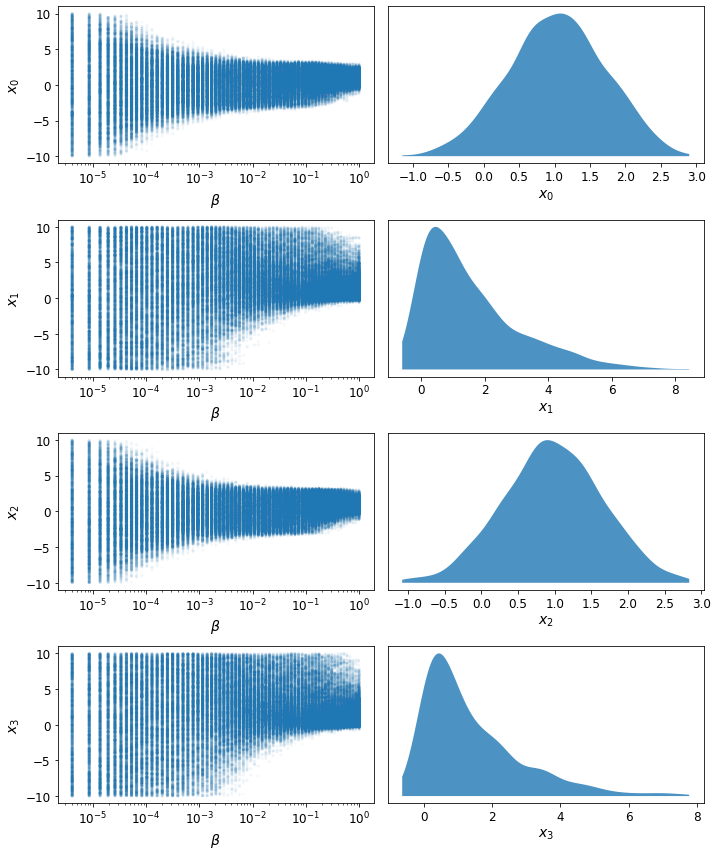

In [4]:
import matplotlib.pyplot as plt

# Trace plot
pc.plotting.trace(results, dims=[0,1,2,3])
plt.show()

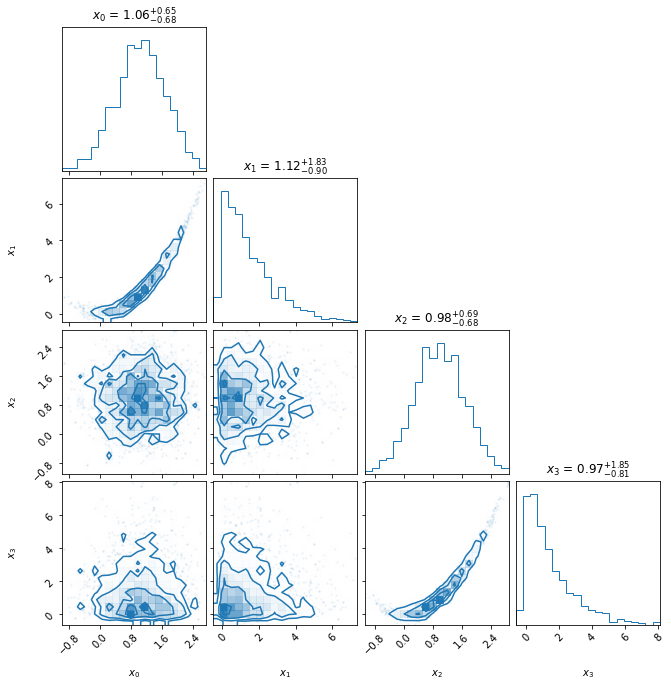

In [5]:
# Corner plot
pc.plotting.corner(results, dims=[0,1,2,3])
plt.show()

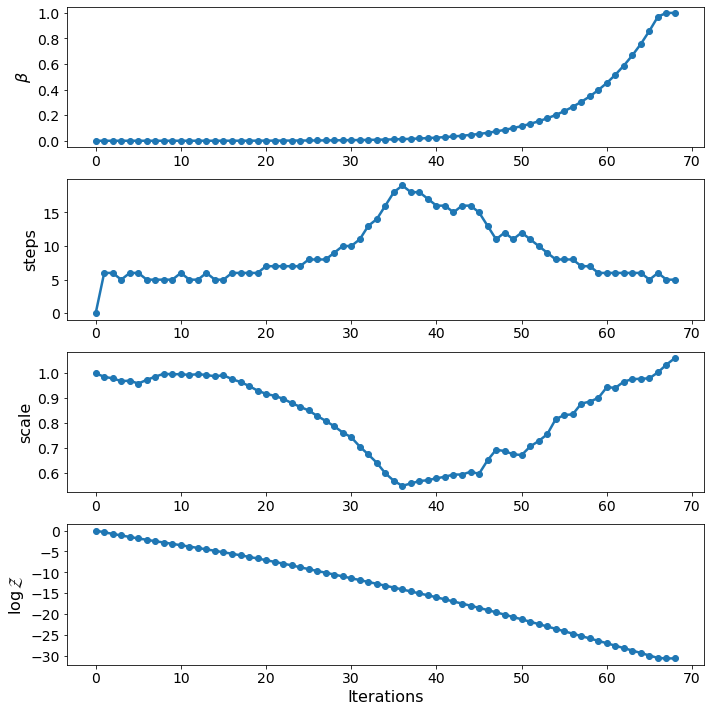

In [6]:
# Run plot
pc.plotting.run(results)
plt.show()

## Get results

Furthermore, you can access the results of the analysis using the ``sampler.results`` dictionary.

In [7]:
print(results.keys())

dict_keys(['samples', 'loglikelihood', 'logprior', 'logz', 'iter', 'x', 'logl', 'logp', 'logw', 'ess', 'ncall', 'beta', 'accept', 'scale', 'steps'])
